# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt

/home/felipe/anaconda3/envs/pdsdev_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading data

In [2]:
data = pd.read_csv('./datasets/kc_house_data.csv')

# Dataset overview

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
columns = list(data.columns)
columns

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
# Data dimension
print('Number of rows: {}'.format(data.shape[0]))
print('Number of coluns: {}'.format(data.shape[1]))

Number of rows: 21613
Number of coluns: 21


In [6]:
# Data types
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Changing date type
data['date'] = pd.to_datetime(data['date'])

In [8]:
# checking N/A
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploratory Analisys

In [9]:
num_attributes = data.select_dtypes(include=['int64','float64'])
num_attributes.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
#Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attribute','min','max','range','mean','median','std','skew','kurtosis']
m

,attribute,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000102e+06,9.900000e+09,9.899000e+09,4.580302e+09,3.904930e+09,2.876499e+09,0.243329,-1.260542
1,price,7.500000e+04,7.700000e+06,7.625000e+06,5.400881e+05,4.500000e+05,3.671187e+05,4.024069,34.585540
2,bedrooms,0.000000e+00,3.300000e+01,3.300000e+01,3.370842e+00,3.000000e+00,9.300403e-01,1.974300,49.063653
3,bathrooms,0.000000e+00,8.000000e+00,8.000000e+00,2.114757e+00,2.250000e+00,7.701453e-01,0.511108,1.279902
4,sqft_living,2.900000e+02,1.354000e+04,1.325000e+04,2.079900e+03,1.910000e+03,9.184196e+02,1.471555,5.243093
5,sqft_lot,5.200000e+02,1.651359e+06,1.650839e+06,1.510697e+04,7.618000e+03,4.141955e+04,13.060019,285.077820
6,floors,1.000000e+00,3.500000e+00,2.500000e+00,1.494309e+00,1.500000e+00,5.399764e-01,0.616177,-0.484723
7,waterfront,0.000000e+00,1.000000e+00,1.000000e+00,7.541757e-03,0.000000e+00,8.651520e-02,11.385108,127.632494
8,view,0.000000e+00,4.000000e+00,4.000000e+00,2.343034e-01,0.000000e+00,7.662998e-01,3.395750,10.893022
9,condition,1.000000e+00,5.000000e+00,4.000000e+00,3.409430e+00,3.000000e+00,6.507280e-01,1.032805,0.525764


In [11]:
# Skewness measures the asymmetry of a distribution.
# Positive skew indicates a long right tail, while negative skew indicates a long left tail.
# Kurtosis measures the weight of the tails and the presence of extreme values (outliers).
# High kurtosis indicates heavy tails and more extreme values, while low kurtosis indicates light tails.

In [12]:
#description with sweetviz
eda=sv.analyze(data)
eda.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:>

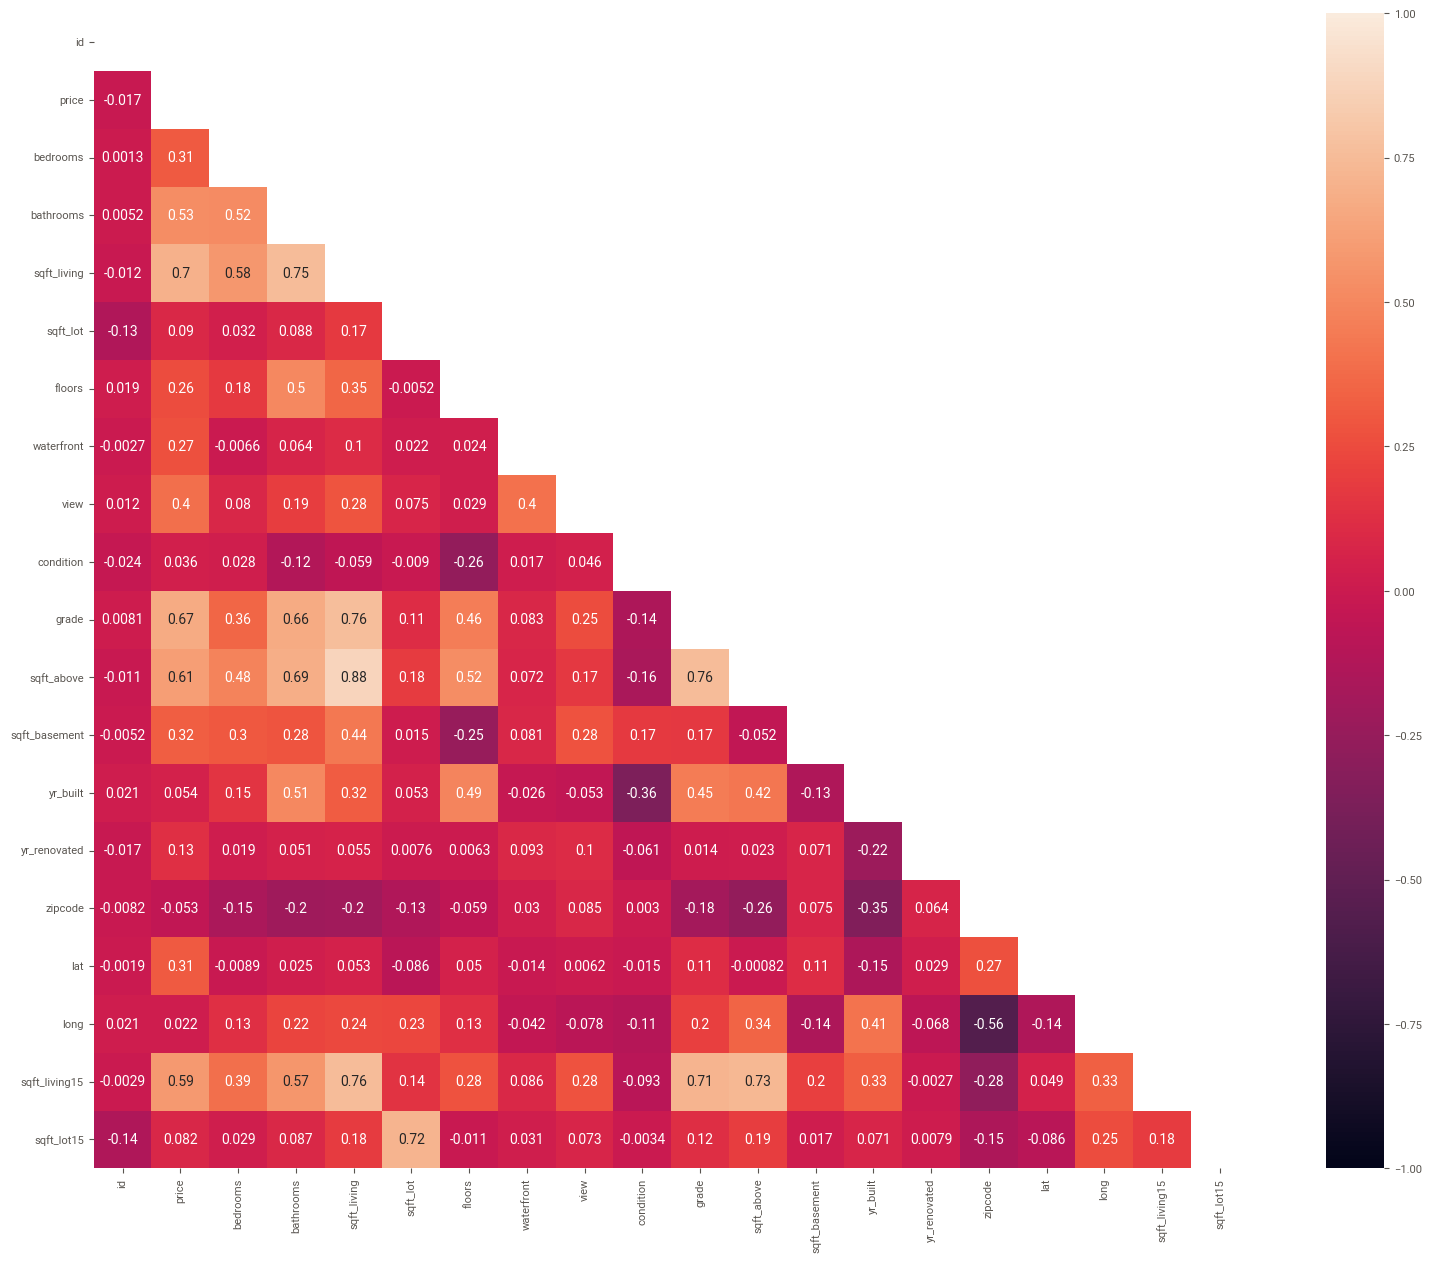

In [13]:
# CORRELATION MATRIX

# Compute the correlation matrix
corr = num_attributes.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square = True, annot=True, vmin=-1, vmax=1)



### We can see a strong positive correlation between bathrooms and (sqft_living15,sqft_above,gade and sqft_living)
### and bewteen sqft_living15 to grade and sqft_above

In [14]:
new_num_attributes = num_attributes[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].copy()
new_num_attributes

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287


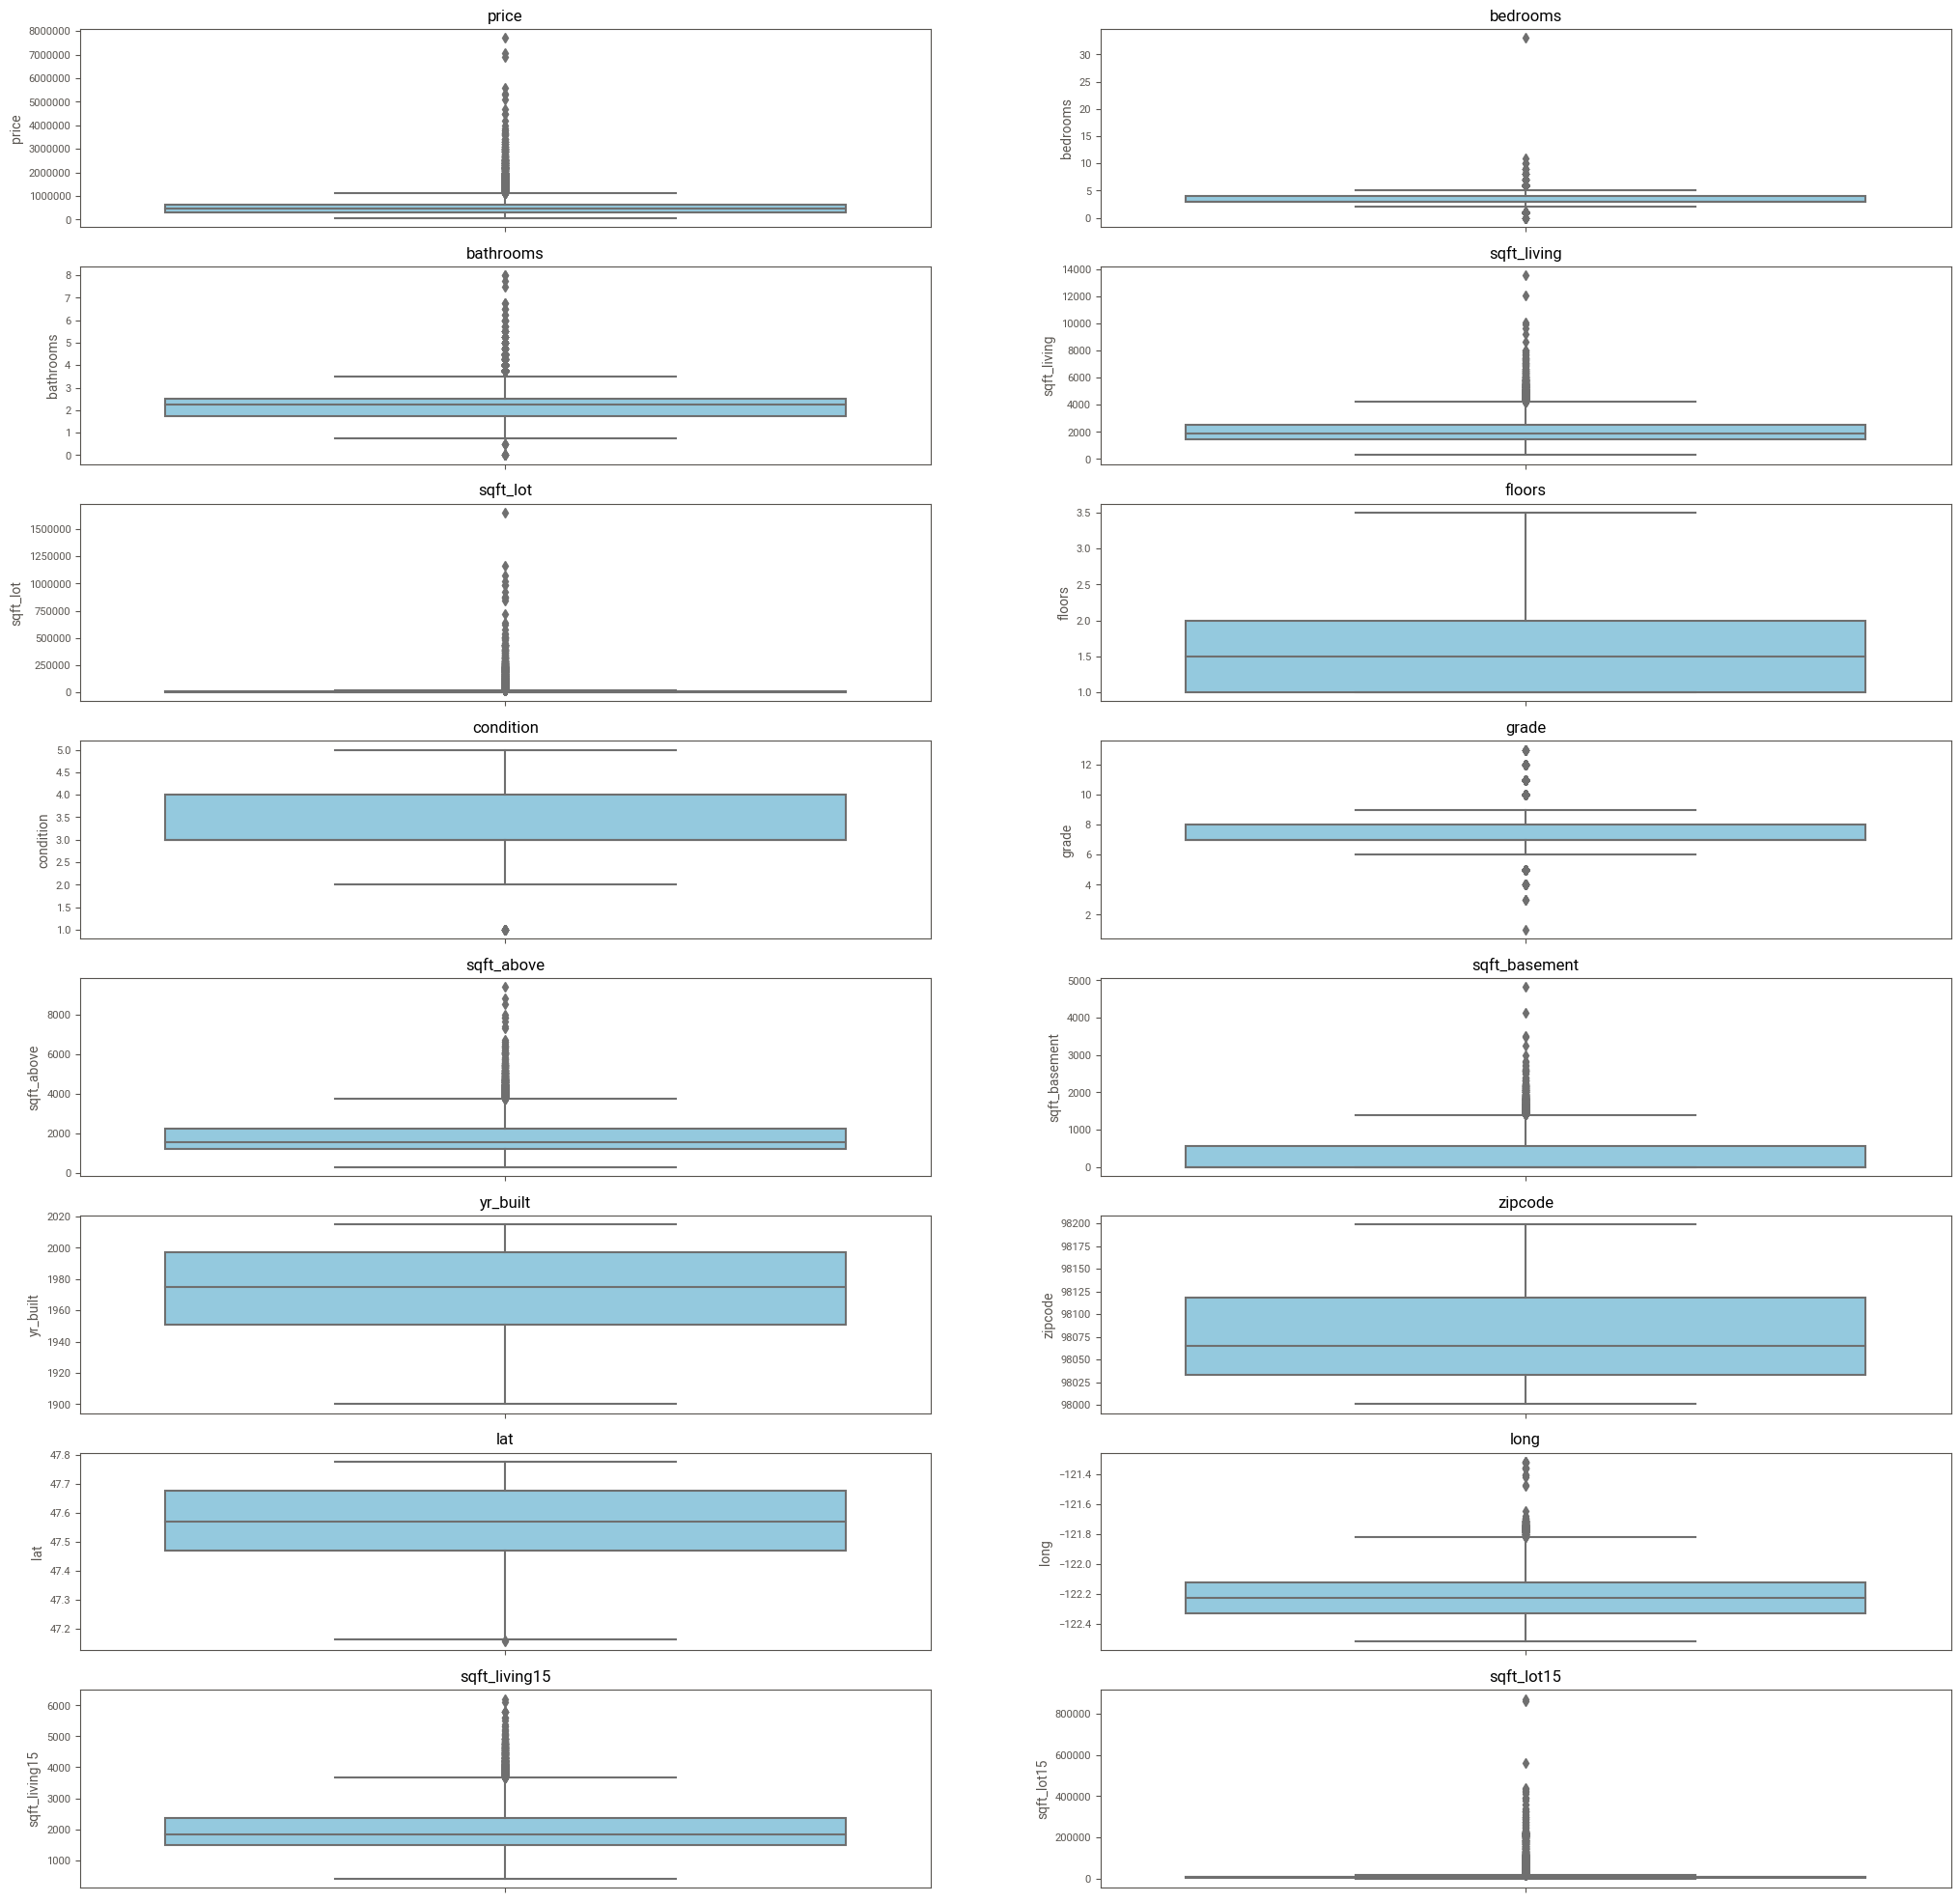

In [15]:
#BoxPlot
fig, axes = plt.subplots(8, 2, figsize=(25, 25))
# Lista com os nomes das colunas e os eixos
colunas = new_num_attributes.columns
eixos = axes.flatten()  # transforma a matriz em uma lista

# boxplots
for i, col in enumerate(colunas):
    sns.boxplot(data=new_num_attributes, y=col, ax=eixos[i], color='skyblue')
    eixos[i].set_title(f'{col}')


plt.show()

# CEO Questions

## Data Overview

### 1. How many houses are available for purchase?

In [16]:
print("There are {} houses".format(data.shape[0]))

There are 21613 houses


### 2. How many attributes do the houses have?

In [17]:
print("There are {} attributes for the houses".format(data.shape[1]))

There are 21 attributes for the houses


### 3. What are the attributes of the houses?

In [18]:
attr = list(data.columns)
print ( 'the attributes are:')
for i in attr:
    print(i)

the attributes are:
id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


## Property Characteristics

### 4. Which is the most expensive house (the house with the highest selling price)?

In [34]:
#print("The most expesnive house cost: {}".format(data['price'].max()))
var=data[['id','price']].sort_values('price',ascending=False).iloc[0]
print("The most expenside house has ID {} and cost {}".format(var["id"],var["price"]))

The most expenside house has ID 6762700020.0 and cost 7700000.0


### 5. Which house has the highest number of bedrooms?

In [35]:
var = data[['id','bedrooms']].sort_values('bedrooms',ascending=False).iloc[0]
print("Highest number of bedrooms belong to ID {} with {} bedrooms.".format(var['id'],var['bedrooms']))

Highest number of bedrooms belong to ID 2402100895 with 33 bedrooms.


### 6. What is the total number of bedrooms in the dataset?

In [39]:
var = data['bedrooms'].sum()
print("Total of bedroom is {}.".format(var))

Total of bedroom is 72854.


### 7. How many houses have 2 bathrooms?

In [ ]:
#3 ways
var = data[['bathrooms']][data['bathrooms']==2].count()
var1 = data.query('bathrooms==2').count().iloc[1]
var2 =data[(data.bathrooms == 2)].count().iloc[1]
print("Total of houses with 2 bathrooms is {}.".format(var))
print("Total of houses with 2 bathrooms is {}.".format(var1))
print("Total of houses with 2 bathrooms is {}.".format(var2))

Total of houses with 2 bathrooms is floors    782
dtype: int64.
Total of houses with 2 bathrooms is 1930.
Total of houses with 2 bathrooms is 1930.


### 8. How many houses have more than 2 floors?

In [57]:
#3 ways
var = data[['floors']][data['floors']>2].count()
var1 = data.query('floors > 2').count().iloc[1]
var2 =data[(data.floors> 2)].count().iloc[1]
print("Total of houses with more than 2 floors is {}.".format(var))
print("Total of houses with more than 2 floors is {}.".format(var1))
print("Total of houses with more than 2 floors is {}.".format(var2))

Total of houses with more than 2 floors is floors    782
dtype: int64.
Total of houses with more than 2 floors is 782.
Total of houses with more than 2 floors is 782.


### 9. How many houses have a sea view?

### 10. Among the houses with a sea view, how many have 3 bedrooms?

## Pricing Analysis

### 11. What is the average price of all houses in the dataset?

### 12. What is the average price of houses with 2 bathrooms?

### 13. What is the minimum price among houses with 3 bedrooms?

## Size & Layout Analysis

### 14. How many houses have more than 300 square meters of living room area?

### 15. Among the houses with more than 300 square meters of living room area, how many have more than 2 bathrooms?

# Insights

# Business Questions

## Which properties should House Rocket buy and at what price ?

## Once the property is purchased, when would be the best time to sell it?